# Intro

In [167]:
import os
import os.path as op

import numpy as np
import scipy as sp
import pandas as pd
import sqlalchemy as sa
import numba

from IPython.display import display, HTML
import matplotlib.pyplot as plt

import qgrid
qgrid.nbinstall(overwrite=True)
qgrid.set_defaults(remote_js=True, precision=4)

from common import dat

In [168]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [169]:
import seaborn as sns
sns.set_context('notebook', font_scale=2)

In [170]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
', '.join(
    {atc 
     for atcs in drug_info_release_3[drug_info_release_3['atcs'].notnull()]['atcs'] 
     for atc in atcs.split(',')}
)

'L01XE16, P01BA01, L01BC05, L02BA01, L01XE12, L01XE02, L01XX32, L01XX38, L04AA18, L01XE09, L01XX45, L01XE21, L01DB01, L02BA03, L01CD01, L01XE25, L01BC02, L01BC07, L01XA02, L01XE10, L01XX17, L01CA04, L01CD02, L01DB03, L01CB01'

In [189]:
atcs = {atc 
     for atcs in drug_info_release_3[drug_info_release_3['atcs'].notnull()]['atcs'] 
     for atc in atcs.split(',')}

{'L01', 'L02', 'L04', 'P01'}

In [191]:
from collections import Counter

In [194]:
Counter([x[:3] for x in atcs])

Counter({'L01': 21, 'L02': 2, 'L04': 1, 'P01': 1})

# Gene expression

In [11]:
gex = (
    pd.read_csv('challenge_data/sanger_molecular_data/gex.csv/gex.csv', sep=',', index_col=0)
)
gex.sort_index(axis=0, inplace=True)
gex.sort_index(axis=1, inplace=True)

In [12]:
display(gex.head())
print(gex.shape)

,22RV1,647-V,A549,BFTC-905,BT-20,BT-474,BT-549,C32,CAL-120,CAL-148,CAL-51,CAMA-1,COLO-205,Calu-3,Calu-6,DMS-114,DU-4475,EVSA-T,HCC1143,HCC1187,HCC1395,HCC1419,HCC1428,HCC1500,HCC1569,HCC1806,HCC1937,HCC1954,HCC38,HCC70,HCT-116,HT-1197,HT-1376,HT-29,Hs-578-T,J82,KATOIII,KMS-11,KU-19-19,LS-513,M14,MCF7,MDA-MB-157,MDA-MB-231,MDA-MB-361,MDA-MB-415,MDA-MB-436,MDA-MB-453,MDA-MB-468,MFM-223,NCI-H1299,NCI-H1563,NCI-H1703,NCI-H1793,NCI-H1975,NCI-H2085,NCI-H2170,NCI-H2228,NCI-H226,NCI-H2291,NCI-H23,NCI-H3122,NCI-H358,NCI-H520,NCI-H522,NCI-H747,NCI-H838,NCI-SNU-16,RKO,RT4,SW48,SW620,SW780,SW837,SW900,SW948,T-24,T47D,TCCSUP,UACC-812,UM-UC-3,VCaP,VM-CUB-1
A1BG,3.530584,2.788878,5.351535,3.654691,3.413191,3.512673,5.503611,5.301429,6.208447,3.967330,5.506955,5.473663,3.659052,3.445720,3.250152,5.025810,3.712974,3.992799,6.653324,3.860001,3.818815,5.062066,4.943208,5.117451,4.651759,7.557265,4.012750,4.394033,4.314272,3.558035,3.231159,2.891782,2.996703,3.333250,5.696576,3.403658,3.765339,3.429940,4.146027,3.436224,4.331010,4.677871,5.633269,3.993322,3.239070,3.160667,5.675360,5.622213,3.251473,5.366995,4.410914,3.784122,5.742016,5.217647,4.617750,5.740719,3.213566,3.538686,3.534607,3.612600,3.906863,3.219004,3.779601,4.238043,4.313296,3.149603,4.420252,3.367825,2.733173,3.359233,3.604357,3.226869,3.085338,3.193601,3.562164,3.120944,3.030891,4.015417,3.386465,4.565087,4.806826,3.442403,3.233975
A1CF,6.364383,2.929860,5.899714,2.879513,2.960482,3.054495,3.107128,3.126334,2.981775,3.075956,2.872071,3.141034,7.210961,2.976691,3.359157,2.947547,2.932662,2.872890,2.809667,2.977178,2.972840,2.985650,2.949033,2.894628,2.962179,2.954737,2.815736,2.913561,2.984274,2.991716,2.957640,3.134189,2.931337,3.035997,2.885962,2.948641,2.972890,3.003220,3.076125,4.307525,2.903783,3.221482,3.235645,2.906964,2.973523,3.065818,2.934078,2.920719,2.909005,2.999021,3.057679,3.178817,3.016101,3.123458,2.994303,2.807124,2.962080,2.965398,2.904675,3.251876,3.131992,2.949988,2.931010,3.123205,3.109252,3.030174,2.933147,7.616778,3.176171,3.076448,3.049307,3.756048,2.833101,3.103560,2.996603,6.035482,3.190048,3.013487,3.177574,2.979775,3.159821,4.049642,3.038010
A2M,5.333116,3.163920,3.385313,3.145660,3.485672,3.374128,3.306887,11.194502,3.133883,3.252529,3.287678,3.553870,3.284050,3.125750,3.392565,3.335711,5.857938,3.371901,3.181255,3.101857,7.333633,3.529651,3.716710,3.443310,12.962624,3.102288,3.262667,3.431608,3.515306,3.548095,3.015057,3.274353,3.390316,3.433933,3.184189,4.248470,3.347285,3.531883,3.692506,3.914816,6.572986,3.502539,4.031836,3.280705,3.496711,3.194349,3.353889,3.585621,6.748265,5.349334,3.481793,3.520293,3.364239,3.264536,3.315750,3.352053,3.425817,3.317356,3.542737,3.271784,3.454828,3.257612,3.189635,3.322089,3.702488,3.320323,3.280496,3.234721,3.587857,3.414311,3.370937,3.423342,3.485978,3.328670,3.253735,3.424149,3.422091,3.435566,10.367402,4.068013,3.318134,3.669509,3.262412
A2ML1,2.907726,2.659589,2.876303,2.618580,3.203183,2.990600,2.750999,2.809603,2.652527,4.176452,3.946546,3.037501,2.830605,2.814887,3.217121,2.734617,2.810957,3.244767,2.882418,2.827790,3.094473,2.970912,3.219312,2.862272,2.984883,2.912465,3.026253,2.914855,2.912427,5.398271,2.747944,3.203564,2.863508,2.872562,2.850983,2.866479,2.935965,2.757120,3.052064,2.872895,2.756976,2.823238,2.994586,2.784113,2.957074,2.861270,2.845468,2.970381,3.038762,2.917099,2.868770,2.816616,2.961184,2.966420,2.875874,3.078362,3.027520,2.722523,2.815796,2.768303,2.855416,2.868177,2.907705,2.753796,2.896764,2.900725,2.714300,3.038924,2.735681,2.920353,3.211124,2.975449,2.791813,2.970275,2.844126,2.810739,3.005388,2.927293,2.841073,2.799085,2.848456,3.045514,2.848073
A3GALT2P,2.815383,2.949402,2.794812,3.051636,2.727538,3.046176,2.600750,2.772945,2.759164,2.973257,3.007847,2.813239,2.817318,2.906216,2.951504,2.867167,3.222096,2.758084,2.898673,2.949275,3.002633,3.039915,2.889149,2.794062,2.696788,2.841877,2.637763,2.627251,2.638571,2.585234,3.350766,2.676877,2.928732,2.911099,2.860962,2.682130,2.642

(17419, 83)


In [13]:
gex.isnull().any().any()

False

In [34]:
ge_gene_names = set(gex.index)
ge_cell_names = set(gex.columns)

# Cell line similarity based on ALL mutations

## Mutations from somewhere else

In [ ]:
mutations = (
    pd.read_csv('challenge_data/sanger_molecular_data/mutations.csv/mutations.csv', sep=',')
)

In [ ]:
mutations.head()

In [ ]:
mutations['mutation'] = (
    mutations['Mutation.AA'].str.findall('p.([A-Z]\d*[A-Z])').apply(lambda x: x[0] if pd.notnull(x) else np.nan)
)

In [ ]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/dream_challenge')
sql_query = """\
select *
from uniprot_kb.hgnc_identifiers
join uniprot_kb.uniprot_sequence using (uniprot_id)
where identifier_id in ('{}')
""".format("', '".join(set(mutations['Gene.name'])))
gene_name2uniprot = pd.read_sql_query(sql_query, engine)

In [ ]:
dat.print2('Number of unique IDs:', len(set(mutations['Gene.name'])))
dat.print2('Number of mapped IDs:', len(set(gene_name2uniprot['identifier_id'])))

In [ ]:
mutations_wseq = (
    mutations
    .dropna(subset=['mutation'])
    .merge(gene_name2uniprot, left_on=['Gene.name'], right_on=['identifier_id'])
)

In [ ]:
def mutation_in_seq(x):
    mutation, sequence = x
    mutation_pos = int(mutation[1:-1])
    return mutation[0] == sequence[mutation_pos-1:mutation_pos]

mutations_wseq['mutation_in_seq'] = (
    mutations_wseq[['mutation', 'uniprot_sequence']]
    .apply(mutation_in_seq, axis=1)
)

In [ ]:
output = (
    mutations_wseq
    [mutations_wseq['mutation_in_seq']]
    [['uniprot_id', 'mutation']]
    .groupby('uniprot_id')
    .agg(lambda x: ','.join(set(x)))
    .reset_index()
)

In [ ]:
output.to_csv('output/missense_mutations.tsv', sep='\t', index=False, header=False)

In [ ]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/dream_challenge')
sql_query = """\
select *
from uniprot_kb.ensembl2uniprot
where ensp_id in ('{}')
""".format("', '".join(set(mutations['Accession.Number'].str.replace('ENST', 'ENSP'))))
ensembl2uniprot = pd.read_sql_query(sql_query, engine)

In [ ]:
dat.print2('Number of unique IDs:', len(set(mutations['Accession.Number'])))
dat.print2('Number of mapped IDs:', len(set(ensembl2uniprot['ensp_id'])))

In [ ]:
len(set(ensembl2uniprot['ensp_id']))

In [ ]:
mutations_wseq['mutation_in_seq'].shape

In [ ]:
!echo $JUPYTER_CONFIG_DIR

In [ ]:
!echo $IPYTHONDIR

In [ ]:
%%javascript
require(['base/js/utils'],
function(utils) {
    utils.load_extensions("toc");
});

# Mutations

In [98]:
mutations = (
    pd.read_csv('challenge_data/sanger_molecular_data/mutations.csv/mutations.csv', sep=',')
)

In [122]:
mutations.head(2)

,Gene.name,Accession.Number,Gene.CDS.length,HGNC.ID,cell_line_name,ID_sample,ID_tumour,Primary.site,Site.subtype,Primary.histology,Histology.subtype,Genome.wide.screen,Mutation.ID,Mutation.CDS,Mutation.AA,Mutation.Description,Mutation.zygosity,GRCh,Mutation.genome.position,strand,SNP,FATHMM.prediction,Mutation.somatic.status,Pubmed_PMID,ID_STUDY,Institute,Institute.Address,Catalogue.Number,Sample.source,Tumour.origin,Age,Comments
0,FRMD4A,ENST00000357447,3120,25491,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,y,COSM109920,c.1049C>T,p.S350L,Substitution - Missense,het,38,10:13693966-13693966,-,n,PASSENGER/OTHER,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
1,LILRB1,ENST00000396331,1953,6605,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,y,COSM162161,c.1690G>A,p.E564K,Substitution - Missense,het,38,19:54636536-54636536,+,n,PASSENGER/OTHER,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"


## Map mutations to drugs

In [140]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream')
all_cell_line_drug_pairs = pd.read_sql_table('all_cell_line_drug_pairs', engine)
drug_pair_to_gene_pair = pd.read_sql_table('drug_pair_to_gene_pair', engine)
drug_pair_to_ensp_pair = pd.read_sql_table('drug_pair_to_ensp_pair', engine)

In [155]:
sql_query = """
select enst, ensp
from az_dream.drug_to_target
"""
enst2ensp = pd.read_sql_query(sql_query, engine).drop_duplicates()

In [156]:
drug_pair_to_ensp_pair = (
    drug_pair_to_ensp_pair
    .merge(enst2ensp.rename(columns={'ensp': 'ensp_1', 'enst': 'enst_1'}), how='left', on='ensp_1')
    .merge(enst2ensp.rename(columns={'ensp': 'ensp_2', 'enst': 'enst_2'}), how='left', on='ensp_2')
)

In [146]:
all_cell_line_drug_pairs.head(2)

,CELL_LINE_UNIQUE_ID,CELL_LINE,COMPOUND_A,COMPOUND_B
0,BT-20.ADAM17.AKT,BT-20,ADAM17,AKT
1,BT-20.ADAM17.AKT_1,BT-20,ADAM17,AKT_1


In [145]:
drug_pair_to_gene_pair.head(2)

,UNIQUE_ID,COMPOUND_A,COMPOUND_B,gene_1,gene_2,gene_pair
0,ADAM17.AKT,ADAM17,AKT,ADAM17,AKT1,"ADAM17,AKT1"
1,ADAM17.AKT,ADAM17,AKT,ADAM17,AKT2,"ADAM17,AKT2"


In [157]:
drug_pair_to_ensp_pair.head(2)

,UNIQUE_ID,COMPOUND_A,COMPOUND_B,ensp_1,ensp_2,ensp_pair,enst_1,enst_2
0,ADAM17.AKT,ADAM17,AKT,ENSP00000309968,ENSP00000451828,"ENSP00000309968,ENSP00000451828",ENST00000310823,ENST00000554581
1,ADAM17.AKT,ADAM17,AKT,ENSP00000309968,ENSP00000384293,"ENSP00000309968,ENSP00000384293",ENST00000310823,ENST00000407796


In [159]:
# How many gene ids can we map?
gene_set = set(drug_pair_to_gene_pair['gene_1']) | set(drug_pair_to_gene_pair['gene_2'])

print(len(gene_set))
print(len(gene_set - set(mutations['Gene.name'])))

1511
329


In [160]:
# How many ensembl ids can we map?
enst_set = set(drug_pair_to_ensp_pair['enst_1']) | set(drug_pair_to_ensp_pair['enst_2'])

print(len(enst_set))
print(len(enst_set - set(mutations['Accession.Number'])))

2797
1642


Clearly gene ids are the winnders here...

In [17]:
m_gene_names = set(mutations['Gene.name'])

In [18]:
m_gene_names - ge_gene_names

{'TRPM3_ENST00000377110',
 'LSM14B_ENST00000279068',
 'PSMB5_ENST00000493471',
 'OPN1LW_ENST00000369951',
 'FAM22D',
 'C20orf173',
 'AMICA1_ENST00000356289',
 'KDM2B_ENST00000377069',
 'PNCK_ENST00000393831',
 'SETDB1_ENST00000498193',
 'CLEC17A_ENST00000417570',
 'SOX2',
 'PAPPA2_ENST00000367661',
 'TGIF2',
 'ZNF793_ENST00000445217',
 'CDC42BPA_ENST00000366765',
 'HDAC2_ENST00000398283',
 'KRT8P11',
 'IL16_ENST00000302987',
 'LBH',
 'HNRNPH1_ENST00000356731',
 'KLRC3',
 'SLC43A3',
 'PTCH1_ENST00000375274',
 'COL2A1_ENST00000380518',
 'OVGP1_ENST00000369728',
 'PFKM_ENST00000340802',
 'PBXIP1_ENST00000368460',
 'GCNT7_ENST00000243913',
 'Q5VVH2_HUMAN',
 'SP140L_ENST00000415673',
 'C5orf5',
 'SLC35A2_ENST00000376515',
 'CAB39_ENST00000258418',
 'CDK18_ENST00000429964',
 'CEP78_ENST00000376597',
 'VEZT_ENST00000261219',
 'LATS1_ENST00000392273',
 'BIRC5_ENST00000301633',
 'ATP5G2_ENST00000394349',
 'HSPC159',
 'NFATC2_ENST00000371564',
 'C20orf80',
 'TXNDC11_ENST00000356957',
 'G6PD_ENST

In [63]:
len(set(mutations['Mutation.ID']))

74556

In [60]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream')
sql_query = """
select count(distinct name)
from homo_sapiens_variation_81_38.variation
where name in ('{}')
""".format("', '".join(mutations['Mutation.ID'].drop_duplicates()))
df = pd.read_sql_query(sql_query, engine)

In [61]:
df

,count(distinct name)
0,8875


In [64]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream')
sql_query = """
select count(distinct name)
from homo_sapiens_variation_81_38.variation_synonym
where name in ('{}')
""".format("', '".join(mutations['Mutation.ID'].drop_duplicates()))
df = pd.read_sql_query(sql_query, engine)

In [65]:
df

,count(distinct name)
0,0


In [57]:
mutations['Mutation.ID']

0         COSM109920
1         COSM162161
2         COSM192977
3         COSM200454
4         COSM212958
5         COSM212959
6         COSM315414
7         COSM574718
8         COSM959198
9        COSM1343775
10       COSM1385554
11       COSM1583704
12       COSM1929028
13       COSM1934754
14       COSM1956338
15       COSM1972484
16       COSM1972787
17       COSM1973296
18       COSM1985408
19       COSM1993127
20       COSM1994163
21       COSM1994164
22       COSM2000773
23       COSM2001853
24       COSM2009044
25       COSM2011712
26       COSM2011778
27       COSM2015108
28       COSM2017201
29       COSM2024881
30       COSM2025088
31       COSM2033029
32       COSM2035402
33       COSM2036354
34       COSM2037552
35       COSM2053731
36       COSM2064515
37       COSM2072820
38       COSM2082711
39       COSM2083652
40       COSM2085932
41       COSM2085933
42       COSM2090844
43       COSM2091505
44       COSM2092003
45       COSM2101721
46       COSM2106305
47       COSM

In [56]:
mutations[~mutations['Mutation.ID'].str.startswith('COSM')]

,Gene.name,Accession.Number,Gene.CDS.length,HGNC.ID,cell_line_name,ID_sample,ID_tumour,Primary.site,Site.subtype,Primary.histology,Histology.subtype,Genome.wide.screen,Mutation.ID,Mutation.CDS,Mutation.AA,Mutation.Description,Mutation.zygosity,GRCh,Mutation.genome.position,strand,SNP,FATHMM.prediction,Mutation.somatic.status,Pubmed_PMID,ID_STUDY,Institute,Institute.Address,Catalogue.Number,Sample.source,Tumour.origin,Age,Comments


In [ ]:
mutation_density 

In [ ]:
difference_in_age  # Age

In [28]:
mutations.columns

Index(['Gene.name', 'Accession.Number', 'Gene.CDS.length', 'HGNC.ID', 'cell_line_name', 'ID_sample', 'ID_tumour', 'Primary.site', 'Site.subtype', 'Primary.histology', 'Histology.subtype', 'Genome.wide.screen', 'Mutation.ID', 'Mutation.CDS', 'Mutation.AA', 'Mutation.Description', 'Mutation.zygosity', 'GRCh', 'Mutation.genome.position', 'strand', 'SNP', 'FATHMM.prediction', 'Mutation.somatic.status', 'Pubmed_PMID', 'ID_STUDY', 'Institute', 'Institute.Address', 'Catalogue.Number', 'Sample.source', 'Tumour.origin', 'Age', 'Comments'], dtype='object')

In [35]:
set(mutations['cell_line_name']) - ge_cell_names

{'MDA-MB-175-VII', 'NCI-H1437'}

In [66]:
len(set(mutations['cell_line_name']))

85

In [68]:
len(mutations[['cell_line_name', 'ID_sample', 'ID_tumour']].drop_duplicates())

85

In [69]:
set(mutations['Primary.site'])

{'breast',
 'haematopoietic_and_lymphoid_tissue',
 'large_intestine',
 'lung',
 'prostate',
 'skin',
 'stomach',
 'urinary_tract'}

In [94]:
set(mutations['Site.subtype'])

{'NS', 'bladder', 'caecum', 'colon', 'rectum'}

In [95]:
set(mutations['Primary.histology'])

{'carcinoma', 'lymphoid_neoplasm', 'malignant_melanoma'}

In [96]:
set(mutations['Histology.subtype'])

{'NS',
 'adenocarcinoma',
 'bronchioloalveolar_adenocarcinoma',
 'ductal_carcinoma',
 'mixed_adenosquamous_carcinoma',
 'non_small_cell_carcinoma',
 'plasma_cell_myeloma',
 'small_cell_carcinoma',
 'squamous_cell_carcinoma',
 'transitional_cell_carcinoma'}

In [73]:
set(mutations['Genome.wide.screen'])

{'y'}

In [77]:
set(mutations['Mutation.Description'])

{'Complex - compound substitution',
 'Complex - deletion inframe',
 'Complex - frameshift',
 'Complex - insertion inframe',
 'Deletion - Frameshift',
 'Deletion - In frame',
 'Insertion - Frameshift',
 'Insertion - In frame',
 'Nonstop extension',
 'Substitution - Missense',
 'Substitution - Nonsense',
 'Substitution - coding silent',
 'Unknown'}

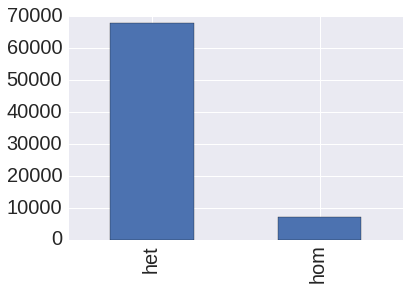

In [123]:
mutations['Mutation.zygosity'].value_counts(dropna=False).plot(kind='bar')

In [79]:
et(mutations['GRCh'])

{38}

In [80]:
set(mutations['Mutation.genome.position'])

{'7:151143538-151143538',
 '12:53060435-53060435',
 '1:22589161-22589161',
 '16:9849871-9849871',
 '13:26681270-26681270',
 '4:69112521-69112521',
 '2:135907371-135907371',
 '3:151447455-151447455',
 '3:170998183-170998183',
 '9:114359607-114359608',
 '7:19729389-19729389',
 '9:16419056-16419056',
 '13:99255202-99255202',
 '5:121852034-121852034',
 '22:16988151-16988151',
 '16:3119617-3119617',
 '23:15591834-15591835',
 '19:19652609-19652609',
 '10:102066600-102066600',
 '15:61915854-61915854',
 '6:15524553-15524553',
 '17:5093005-5093005',
 '18:9775304-9775304',
 '2:232888031-232888031',
 '5:112837902-112837902',
 '6:131700803-131700803',
 '15:31655134-31655134',
 '2:206751028-206751028',
 '7:152202996-152202996',
 '12:76822538-76822538',
 '17:8379882-8379882',
 '8:11783237-11783237',
 '16:57816260-57816260',
 '6:116800681-116800681',
 '20:9539563-9539563',
 '19:31277059-31277059',
 '19:13307838-13307838',
 '15:42529805-42529805',
 '7:36724051-36724051',
 '1:200048240-200048240',
 '10

In [81]:
set(mutations['strand'])

{'+', '-'}

In [82]:
set(mutations['SNP'])

{nan, 'y', 'n'}

In [ ]:
xxx.value_counts()

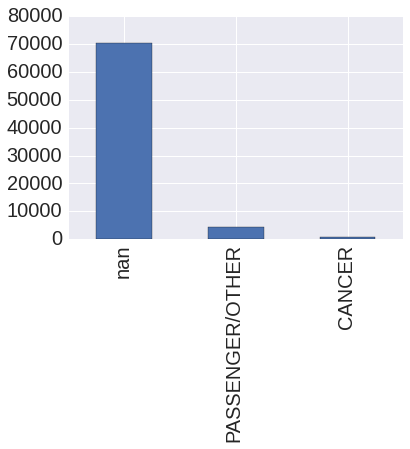

In [124]:
mutations['FATHMM.prediction'].value_counts(dropna=False).plot(kind='bar')

In [84]:
set(mutations['Mutation.somatic.status'])

{'Confirmed somatic variant',
 'Reported in another cancer sample as somatic',
 'Variant of unknown origin'}

In [125]:
mutations['ID_STUDY'].value_counts(dropna=False)

NaN    75281
Name: ID_STUDY, dtype: int64

In [126]:
mutations['Institute'].value_counts(dropna=False)

American Type Culture Collection (ATCC)                   39314
Developmental Therapeutics Program                        14151
German Collection of Microorganisms and Cell Cultures,    13403
European Collection of Cell Cultures                       2549
UNKNOWN                                                    1366
Cell Bank, RIKEN BioResource Center                        1329
Health Science Research Resources Bank                     1212
The University of Hong Kong                                1056
NaN                                                         901
Name: Institute, dtype: int64

In [127]:
mutations['Institute.Address'].value_counts(dropna=False)

P.O. Box 1549, Manassas, VA 20108, USA                                 39314
National Cancer Institute,Frederick,MD 21701                           14151
 Braunschweig, Germany                                                 13403
Health Protection Agency,Porton Down,Salisbury,Wiltshire,SP40JG, UK     2549
UNKNOWN                                                                 1366
3-1-1 Koyadai, Tsukuba, Ibaraki, 305-0074, Japan                        1329
Rinku-minamihama 2-11, Sennan-shi, Osaka 590-0535, Japan                1212
Queen Mary Hospital, Hong Kong                                          1056
NaN                                                                      901
Name: Institute.Address, dtype: int64

In [128]:
mutations['Catalogue.Number'].value_counts(dropna=False)

NaN         17474
CRL-2577     4799
CCL-231      3874
ACC438       3519
CRL-2330     2837
CRL-5896     2182
92020423     1985
CRL-5807     1693
ACC64        1595
ACC302       1349
RCB1192      1329
JCRB1179     1212
CRL-5875     1119
ACC460       1115
CRL-5939     1070
HTB-103      1056
ACC433       1044
ACC361        987
CRL-5889      980
ACC414        908
ACC400        892
CRL-5844      860
HTB-59        755
CCL-237       739
ACC395        730
HTB-132       715
HTB-21        711
HTB-5         704
HTB-128       666
CRL-5803      658
HTB-19        655
HTB-25        620
CRL-1897      611
CRL-5974      591
CRL-1585      578
CRL-1749      565
92020422      564
CRL-1472      559
CRL-2335      558
CRL-5928      534
CRL-2324      531
ACC422        530
CRL-5908      527
CRL-2066      516
CRL-2326      509
HTB-182       498
CRL-5872      464
CRL-5935      461
ACC427        460
CRL-2134      456
CRL-1473      435
HTB-55        429
CRL-2315      428
CCL-235       421
CRL-2169      387
CCL-252   

In [129]:
mutations['Sample.source'].value_counts(dropna=False)

cell-line    75281
Name: Sample.source, dtype: int64

In [130]:
mutations['Tumour.origin'].value_counts(dropna=False)

primary       54683
metastasis    16529
NS             4069
Name: Tumour.origin, dtype: int64

In [131]:
mutations['Age'].value_counts(dropna=False)

NaN    29903
 51     5870
 82     3874
 70     3203
 60     3015
 52     2450
 58     2200
 43     2074
 40     1985
 67     1916
 53     1754
 45     1349
 54     1334
 48     1329
 44     1124
 81     1100
 55     1056
 74     1043
 69     1037
 63      810
 76      730
 38      666
 56      620
 61      599
 33      591
 68      516
 42      509
 62      460
 25      429
 49      428
 80      387
 72      322
 50      215
 23      199
 41      184
Name: Age, dtype: int64

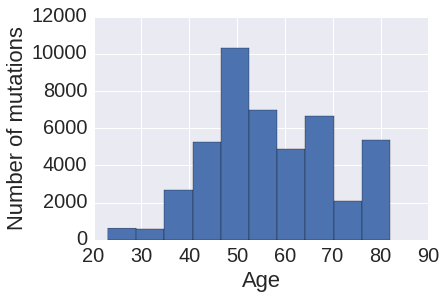

In [137]:
mutations['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of mutations')

In [134]:
mutations['Mutation.ID'].
value_counts(dropna=False).head()

COSM4371855    20
COSM3213707    20
COSM3310593    19
COSM3307847    16
COSM3213738    14
Name: Mutation.ID, dtype: int64

In [135]:
mutations['Comments'].value_counts(dropna=False)

NaN                                               46102
Metastatic site:pleural effusion                   9292
Stage:III                                          2902
Grade:IV,Metastatic site:lymph node,Stage:III      2837
Metastatic site:central nervous system             1985
Metastatic site:lymph node                         1728
Stage:IV                                           1611
Metastatic site:ascitic fluid                      1044
Grade:I,Metastatic site:NA                          980
Grade:III,Metastatic site:lymph node,Stage:III      937
Stage:II                                            908
Metastatic site:bone marrow                         704
Grade:II,Stage:IV                                   611
Metastatic site:ascites                             591
Grade:II,Stage:II                                   558
Stage:III,Metastatic site:NA                        530
Metastatic site:mediastinum                         516
Metastatic site:skin                            

In [93]:
set(mutations['Primary.site'])

{'breast',
 'haematopoietic_and_lymphoid_tissue',
 'large_intestine',
 'lung',
 'prostate',
 'skin',
 'stomach',
 'urinary_tract'}

In [76]:
set(mutations['Mutation.AA'])

{'p.Y205C',
 'p.R710K',
 'p.E223K',
 'p.Q2858K',
 'p.L169V',
 'p.R390W',
 'p.P226A',
 'p.T2980M',
 'p.S185L',
 'p.I1740I',
 'p.I573M',
 'p.T581T',
 'p.V117V',
 'p.S552*',
 'p.R376C',
 'p.V285M',
 'p.A176D',
 'p.S658L',
 'p.R3492C',
 'p.R4084L',
 'p.E161E',
 'p.F29L',
 'p.G110fs*84',
 'p.A365V',
 'p.A488S',
 'p.S317Y',
 'p.K184E',
 'p.V72I',
 'p.S923S',
 'p.A406A',
 'p.T1786T',
 'p.R1409I',
 'p.K1934K',
 'p.R24L',
 'p.L583S',
 'p.V108V',
 'p.V100L',
 'p.V561M',
 'p.S1166S',
 'p.Q391R',
 'p.K1440K',
 'p.E11*',
 'p.E448Q',
 'p.A14T',
 'p.E417K',
 'p.V877A',
 'p.S1418fs*17',
 'p.I277K',
 'p.P954L',
 'p.M219I',
 'p.N161N',
 'p.D99E',
 'p.D877D',
 'p.I689I',
 'p.Y421fs*37',
 'p.H2292fs*11',
 'p.G200V',
 'p.C7Y',
 'p.W12176*',
 'p.Y989fs*9',
 'p.S1130*',
 'p.K842K',
 'p.K390N',
 'p.I457T',
 'p.V394L',
 'p.G1113S',
 'p.I378I',
 'p.P789P',
 'p.N664fs*50',
 'p.S2244C',
 'p.P160P',
 'p.Q5Q',
 'p.R332*',
 'p.Q939H',
 'p.A135V',
 'p.A203S',
 'p.G1699G',
 'p.L313F',
 'p.S362F',
 'p.A7_A9delAAA',
 'p

In [27]:
mutations[
    ~(mutations['Accession.Number'].str.startswith('ENST')) &
     (pd.isnull(mutations['HGNC.ID']))
]

,Gene.name,Accession.Number,Gene.CDS.length,HGNC.ID,cell_line_name,ID_sample,ID_tumour,Primary.site,Site.subtype,Primary.histology,Histology.subtype,Genome.wide.screen,Mutation.ID,Mutation.CDS,Mutation.AA,Mutation.Description,Mutation.zygosity,GRCh,Mutation.genome.position,strand,SNP,FATHMM.prediction,Mutation.somatic.status,Pubmed_PMID,ID_STUDY,Institute,Institute.Address,Catalogue.Number,Sample.source,Tumour.origin,Age,Comments
5434,LOC389901,XM_372262.3,1428,NaN,SW48,909751,827235,large_intestine,colon,carcinoma,adenocarcinoma,y,COSM4378178,c.653C>T,p.P218L,Substitution - Missense,het,38,23:150231846-150231846,-,n,NaN,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CCL-231,cell-line,primary,82,NaN
13158,LOC440345,XM_496125.1,7707,NaN,COLO-205,905961,823489,large_intestine,colon,carcinoma,adenocarcinoma,y,COSM3278235,c.3135-2A>C,p.?,Unknown,het,38,16:21885318-21885318,-,n,NaN,Variant of unknown origin,NaN,NaN,Developmental Therapeutics Program,"National Cancer Institute,Frederick,MD 21701",NaN,cell-line,primary,70,NaN
13227,LOC440345,XM_496125.1,7707,NaN,COLO-205,905961,823489,large_intestine,colon,carcinoma,adenocarcinoma,y,COSM4257525,c.3584A>T,p.K1195I,Substitution - Missense,het,38,16:21881847-21881847,-,n,NaN,Variant of unknown origin,NaN,NaN,Developmental Therapeutics Program,"National Cancer Institute,Frederick,MD 21701",NaN,cell-line,primary,70,NaN
15626,SgK494,SU_SgK494,1350,NaN,BFTC-905,910926,828410,urinary_tract,bladder,carcinoma,transitional_cell_carcinoma,y,COSM2800445,c.950G>T,p.G317V,Substitution - Missense,het,38,17:28611460-28611460,-,n,NaN,Variant of unknown origin,NaN,NaN,German Collection of Microorganisms and Cell C...,"Braunschweig, Germany",ACC361,cell-line,primary,51,NaN
16763,LOC440345,XM_496125.1,7707,NaN,SW780,687457,615617,urinary_tract,bladder,carcinoma,NS,y,COSM3278241,c.2184T>C,p.D728D,Substitution - coding silent,hom,38,16:21890104-21890104,-,n,NaN,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2169,cell-line,primary,80,Stage:I
19432,Q86Y87,BC046415.1,319,NaN,22RV1,924100,840876,prostate,NS,carcinoma,adenocarcinoma,y,COSM2749276,c.58C>A,p.L20M,Substitution - Missense,het,38,19:23914967-23914967,+,n,NaN,Variant of unknown origin,NaN,NaN,German Collection of Microorganisms and Cell C...,"Braunschweig, Germany",ACC438,cell-line,primary,NaN,NaN
26724,CSAG4,OTTHUMT00000058758.1,132,NaN,CAL-51,910927,828411,breast,NS,carcinoma,NS,y,COSM4378231,c.63-1G>C,p.?,Unknown,het,38,23:152740611-152740611,+,n,NaN,Variant of unknown origin,NaN,NaN,German Collection of Microorganisms and Cell C...,"Braunschweig, Germany",ACC302,cell-line,metastasis,45,Metastatic site:pleural effusion
28745,LOC392556,XM_498396.1,951,NaN,NCI-H2085,687812,615972,lung,NS,carcinoma,non_small_cell_carcinoma,y,COSM3233982,c.7C>T,p.P3S,Substitution - Missense,hom,38,23:149650118-149650118,-,n,NaN,Variant of unknown origin,NaN,NaN,NaN,NaN,NaN,cell-line,NS,NaN,NaN
31229,SEC16A_NM_014866.1,NM_014866.1,7074,NaN,RKO,909698,827184,large_intestine,colon,carcinoma,NS,y,COSM3215699,c.1718G>A,p.G573D,Substitution - Missense,het,38,9:136475898-136475898,-,n,NaN,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2577,cell-line,primary,NaN,NaN
31231,SEC16A_NM_014866.1,NM_014866.1,7074,NaN,RKO,909698,827184,large_intestine,colon,carcinoma,NS,y,COSM3215709,c.1598T>G,p.L533R,Substitution - Missense,het,38,9:136476018-136476018,-,n,NaN,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2577,cell-line,primary,NaN,NaN


In [26]:
mutations.shape

(75281, 32)

In [22]:
mutations[mutations['HGNC.ID'].isnull()].head(2)

,Gene.name,Accession.Number,Gene.CDS.length,HGNC.ID,cell_line_name,ID_sample,ID_tumour,Primary.site,Site.subtype,Primary.histology,Histology.subtype,Genome.wide.screen,Mutation.ID,Mutation.CDS,Mutation.AA,Mutation.Description,Mutation.zygosity,GRCh,Mutation.genome.position,strand,SNP,FATHMM.prediction,Mutation.somatic.status,Pubmed_PMID,ID_STUDY,Institute,Institute.Address,Catalogue.Number,Sample.source,Tumour.origin,Age,Comments
5,TCF12_ENST00000452095,ENST00000452095,2109,NaN,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,y,COSM212959,c.1433C>T,p.A478V,Substitution - Missense,hom,38,15:57253446-57253446,+,n,PASSENGER/OTHER,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
11,NADK_ENST00000342348,ENST00000342348,1245,NaN,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,y,COSM1583704,c.1238_1240delAGG,p.E413delE,Deletion - In frame,het,38,1:1752909-1752911,-,NaN,NaN,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"


In [ ]:
mutations['mutation'] = (
    mutations['Mutation.AA'].str.findall('p.([A-Z]\d*[A-Z])').apply(lambda x: x[0] if pd.notnull(x) else np.nan)
)

In [ ]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/dream_challenge')
sql_query = """\
select *
from uniprot_kb.hgnc_identifiers
join uniprot_kb.uniprot_sequence using (uniprot_id)
where identifier_id in ('{}')
""".format("', '".join(set(mutations['Gene.name'])))
gene_name2uniprot = pd.read_sql_query(sql_query, engine)

In [ ]:
dat.print2('Number of unique IDs:', len(set(mutations['Gene.name'])))
dat.print2('Number of mapped IDs:', len(set(gene_name2uniprot['identifier_id'])))a

In [ ]:
mutations_wseq = (
    mutations
    .dropna(subset=['mutation'])
    .merge(gene_name2uniprot, left_on=['Gene.name'], right_on=['identifier_id'])
)

In [ ]:
def mutation_in_seq(x):
    mutation, sequence = x
    mutation_pos = int(mutation[1:-1])
    return mutation[0] == sequence[mutation_pos-1:mutation_pos]

mutations_wseq['mutation_in_seq'] = (
    mutations_wseq[['mutation', 'uniprot_sequence']]
    .apply(mutation_in_seq, axis=1)
)

In [ ]:
output = (
    mutations_wseq
    [mutations_wseq['mutation_in_seq']]
    [['uniprot_id', 'mutation']]
    .groupby('uniprot_id')
    .agg(lambda x: ','.join(set(x)))
    .reset_index()
)

In [ ]:
output.to_csv('output/missense_mutations.tsv', sep='\t', index=False, header=False)

In [ ]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/dream_challenge')
sql_query = """\
select *
from uniprot_kb.ensembl2uniprot
where ensp_id in ('{}')
""".format("', '".join(set(mutations['Accession.Number'].str.replace('ENST', 'ENSP'))))
ensembl2uniprot = pd.read_sql_query(sql_query, engine)

In [ ]:
dat.print2('Number of unique IDs:', len(set(mutations['Accession.Number'])))
dat.print2('Number of mapped IDs:', len(set(ensembl2uniprot['ensp_id'])))

In [ ]:
len(set(ensembl2uniprot['ensp_id']))

In [ ]:
mutations_wseq['mutation_in_seq'].shape